In [1]:
import numpy as np
import matplotlib
matplotlib.use("nbagg")
import matplotlib.pyplot as plt

from matplotlib import gridspec 
from mpl_toolkits.axes_grid1 import make_axes_locatable

Duplicate key in file PosixPath('/media/ljy/datadisk/anaconda2/envs/py3/lib/python3.8/site-packages/matplotlib/mpl-data/matplotlibrc'), line 259 ('font.sans-serif: SimHei, DejaVu Sans, Bitstream Vera Sans, Computer Modern Sans Serif, Lucida Grande, Verdana, Geneva, Lucid, Arial, Helvetica, Avant Garde, sans-serif')
Duplicate key in file PosixPath('/media/ljy/datadisk/anaconda2/envs/py3/lib/python3.8/site-packages/matplotlib/mpl-data/matplotlibrc'), line 402 ('axes.unicode_minus: True  # use Unicode for the minus symbol rather than hyphen.  See')


In [2]:
nx   = 10000    
xmax = 10000        
dx   = xmax/(nx-1)  
c0   = 334.         
isrc = int(nx/2)    
ir   = isrc + 100   
nt   = 500         
dt   = 0.0030       

f0   = 40.
t0   = 4. / f0 

idisp = 5 

In [3]:
src  = np.zeros(nt + 1)
time = np.linspace(0 * dt, nt * dt, nt)
src  = -2. * (time - t0) * (f0 ** 2) * (np.exp(-1.0 * (f0 ** 2) * (time - t0) ** 2))

<IPython.core.display.Javascript object>


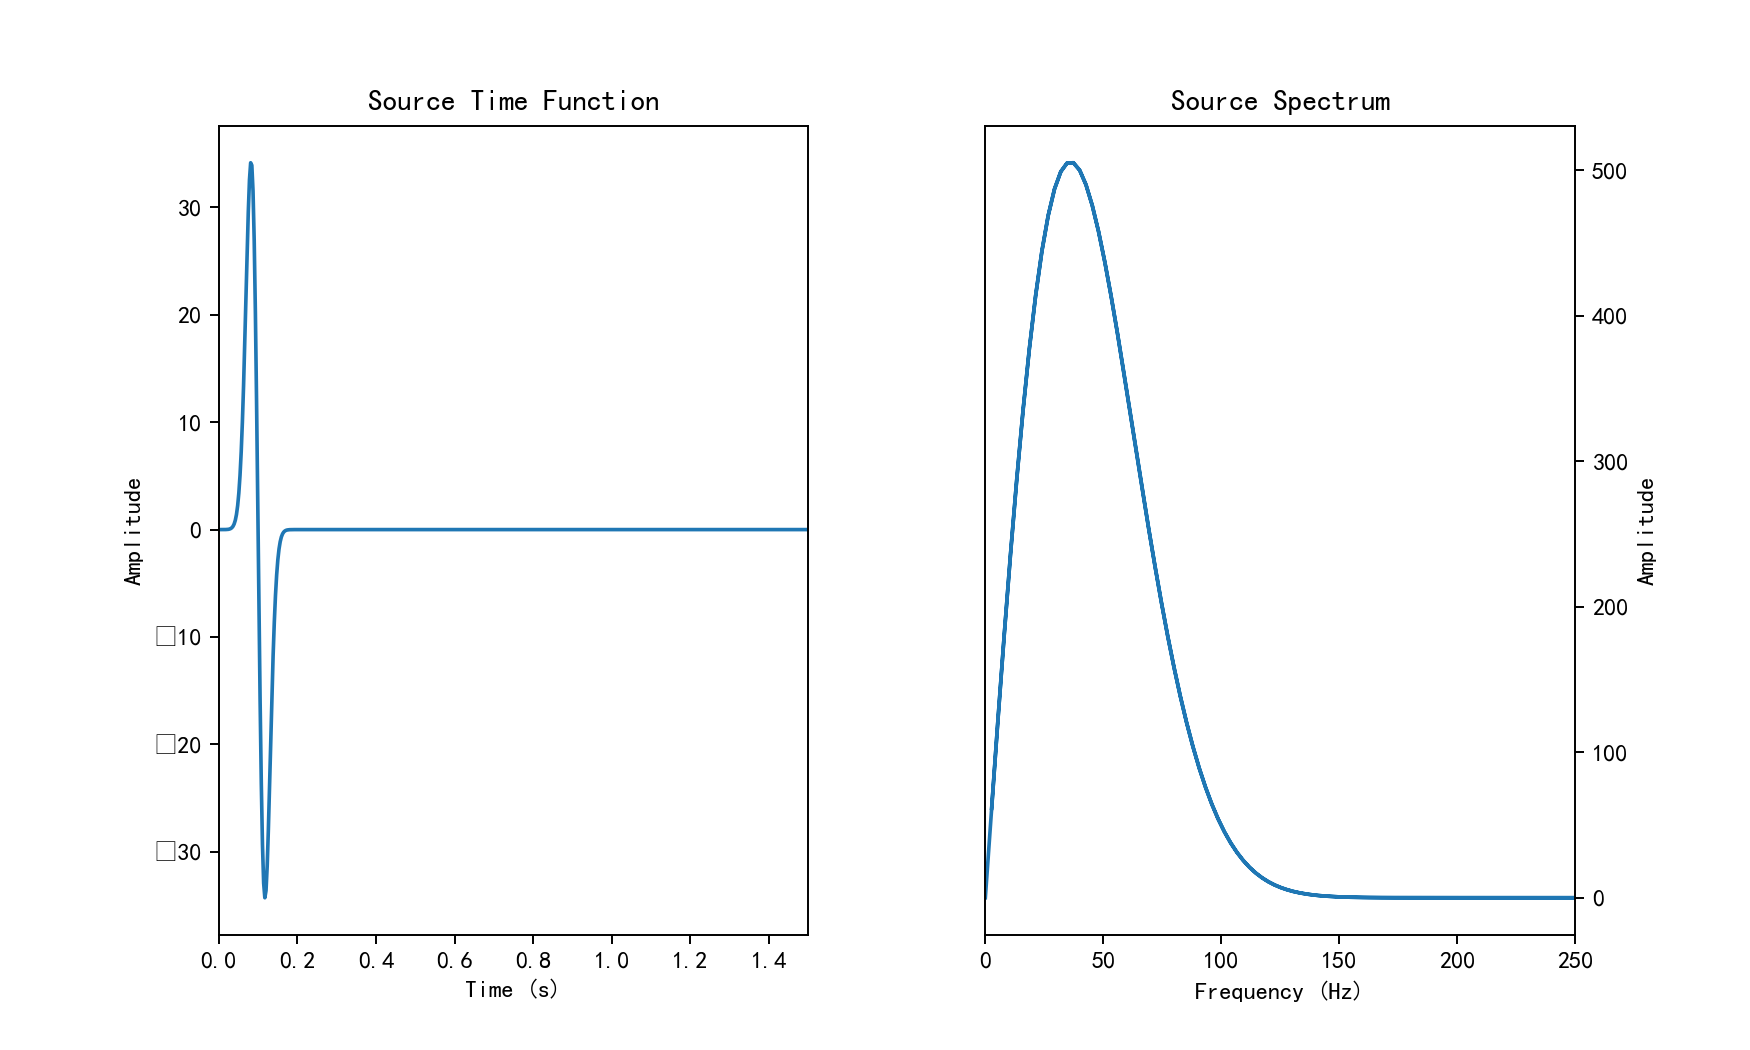

In [4]:
plt.ion()
fig1 = plt.figure(figsize=(10, 6))
gs1  = gridspec.GridSpec(1, 2, width_ratios=[1, 1], hspace=0.3, wspace=0.3)

ax1  = plt.subplot(gs1[0])
ax1.plot(time, src)
ax1.set_title('Source Time Function')
ax1.set_xlim(time[0], time[-1])
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Amplitude')

ax2  = plt.subplot(gs1[1])
spec = np.fft.fft(src) 
freq = np.fft.fftfreq(spec.size, d = dt / 4.) 
ax2.plot(np.abs(freq), np.abs(spec)) 
ax2.set_xlim(0, 250)
ax2.set_title('Source Spectrum')
ax2.set_xlabel('Frequency (Hz)')
ax2.set_ylabel('Amplitude')

ax2.yaxis.tick_right()
ax2.yaxis.set_label_position("right")

plt.show()

<IPython.core.display.Javascript object>


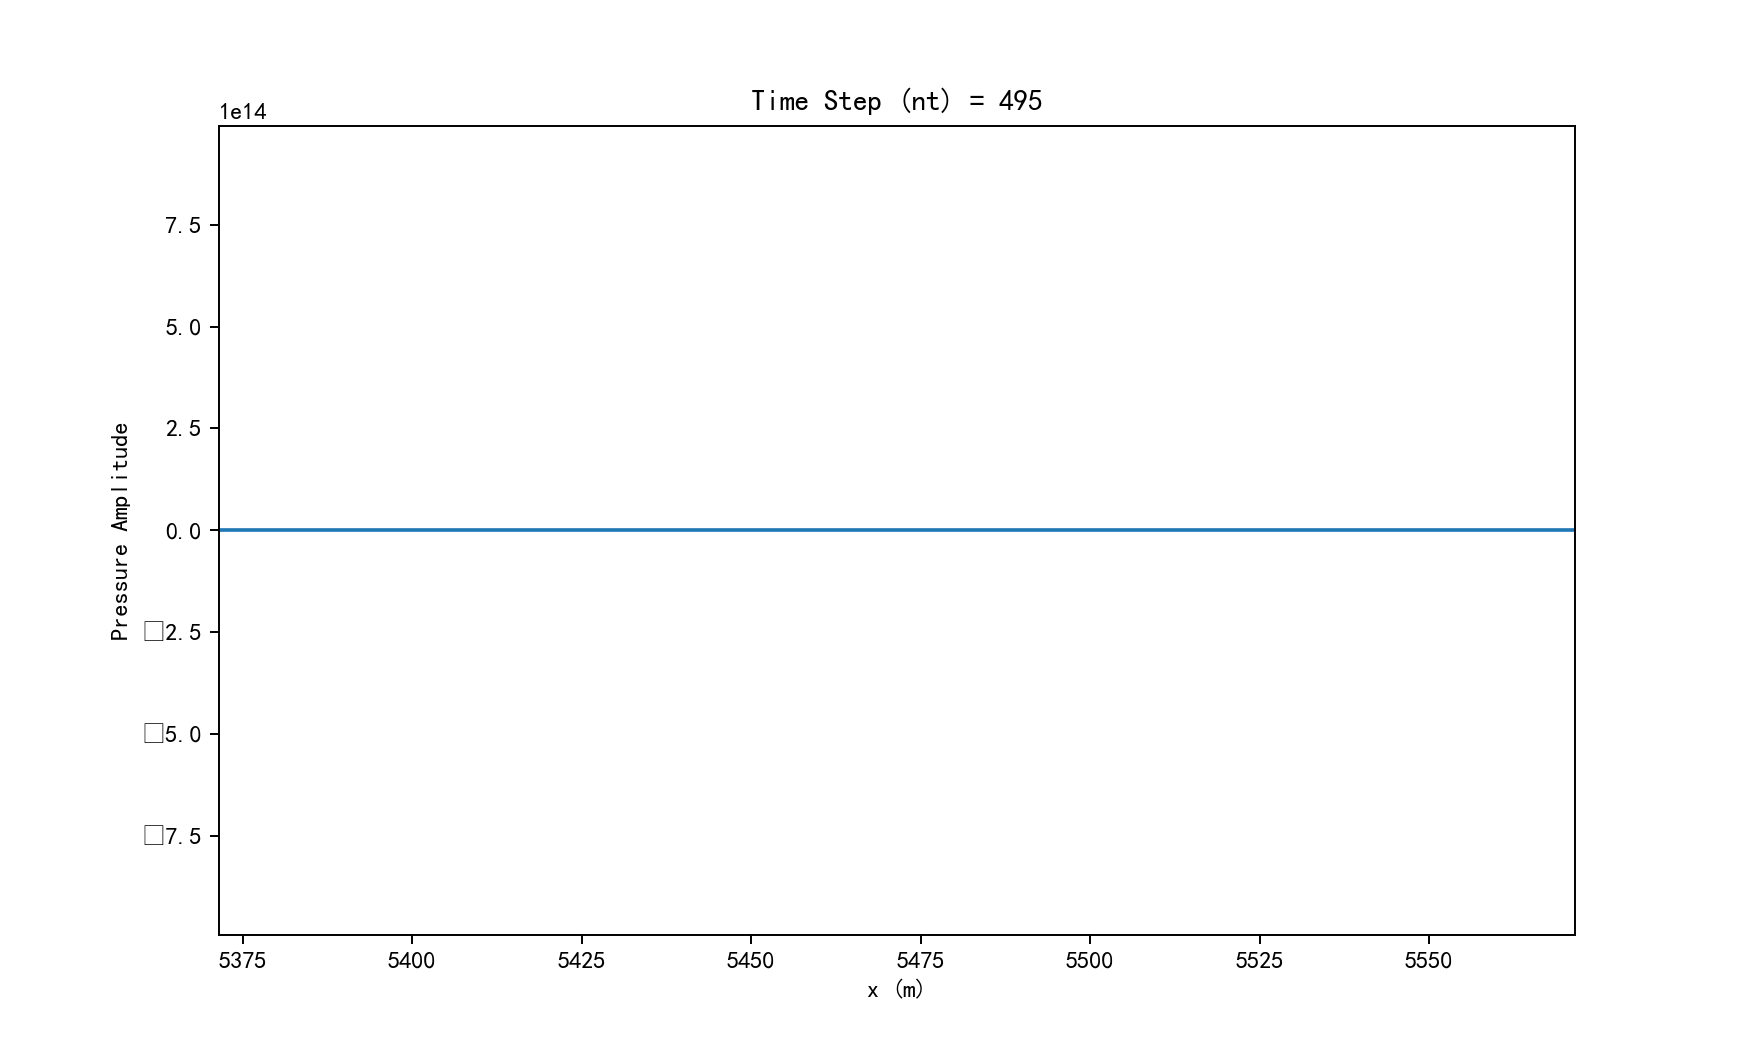

<ipython-input-5-da97561c3007>:21: UserWarning: Attempting to set identical bottom == top == -0.0 results in singular transformations; automatically expanding.
  ax3.set_ylim(-np.max(p), np.max(p))


In [5]:
p    = np.zeros(nx) 
pold = np.zeros(nx) 
pnew = np.zeros(nx) 
d2px = np.zeros(nx) 

c    = np.zeros(nx)
c    = c + c0     

x    = np.arange(nx)
x    = x * dx     

plt.ion()
fig2  = plt.figure(figsize=(10, 6))
gs2   = gridspec.GridSpec(1,1,width_ratios=[1],hspace=0.3, wspace=0.3)

ax3  = plt.subplot(gs2[0])
leg1,= ax3.plot(isrc, 0, 'r*', markersize=11)
# leg2,= ax3.plot(ir, 0, 'k^', markersize=8) 
up31,= ax3.plot(p) 
ax3.set_xlim(0, xmax)
ax3.set_ylim(-np.max(p), np.max(p))
ax3.set_title('Time Step (nt) = 0')
ax3.set_xlabel('x (m)')
ax3.set_ylabel('Pressure Amplitude')
# ax3.legend((leg1, leg2), ('Source', 'Receiver'), loc='upper right', fontsize=10, numpoints=1)


plt.show()

In [6]:
for it in range(nt):

    for i in range(1, nx - 1):
        d2px[i] = (p[i + 1] - 2 * p[i] + p[i - 1]) / dx ** 2

    pnew = 2 * p - pold + c ** 2 * dt ** 2 * d2px

    pnew[isrc] = pnew[isrc] + src[it] / (dx) * dt ** 2
    
    pold, p = p, pnew

    if (it % idisp) == 0:
        ax3.set_title('Time Step (nt) = %d' % it)
        ax3.set_ylim(-1.1*np.max(abs(p)), 1.1*np.max(abs(p)))
        window=100;xshift=25
        ax3.set_xlim(isrc*dx+c0*it*dt-window*dx-xshift, isrc*dx+c0*it*dt+window*dx-xshift)
        up31.set_ydata(p)
        plt.gcf().canvas.draw()

/media/ljy/datadisk/anaconda2/envs/py3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/media/ljy/datadisk/anaconda2/envs/py3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)
